In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from src.constants import *
from src.utility import *
from src.rolling_data import RollingData
from src.per_game_model import PerGameModel
from src.init_DFs.per_game import PerGameInit
from src.init_DFs.next_game import NextGameInit

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

pgModel = PerGameModel()
initPG = PerGameInit()
initNextGame = NextGameInit()

In [3]:
season = "20_22"
situation = "5on5"
TARGET = 'next_profit'

include_null_targets = False
null_target_value = 0

df = pd.read_csv(CSV_DB_PATH + f"{season}/PER_GAME_BY_TEAM_{situation}_{season}.csv")
df = pgModel.add_profit_target(df, include_null_targets)    
df['game_date'] = pd.to_datetime(df['game_date'])
    
selected_cols = df.columns[~df.columns.isin(IGNORED_COLS)]

df_orig = df.copy()

df["next_is_home"] = pgModel.add_col(df.copy(), "is_home")
df["next_opp_team"] = pgModel.add_col(df.copy(), "opp_team")
df["next_game_date"] = pgModel.add_col(df.copy(), "game_date")
df["next_odds"] = pgModel.add_col(df.copy(), "odds")
df["opp_odds"] = pgModel.add_col(df.copy(), "opp_odds")
df["ot_odds"] = pgModel.add_col(df.copy(), "ot_odds")
df = df.set_index('game_date')

<Axes: ylabel='Frequency'>

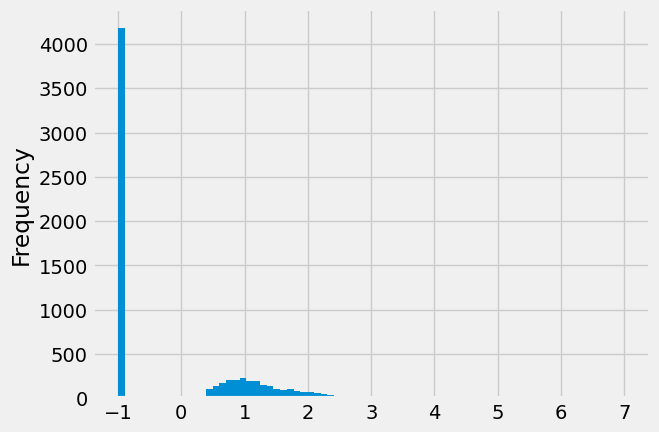

In [12]:
df[TARGET].plot(kind='hist', bins=75)

<Axes: title={'center': 'Outliers'}, xlabel='game_date'>

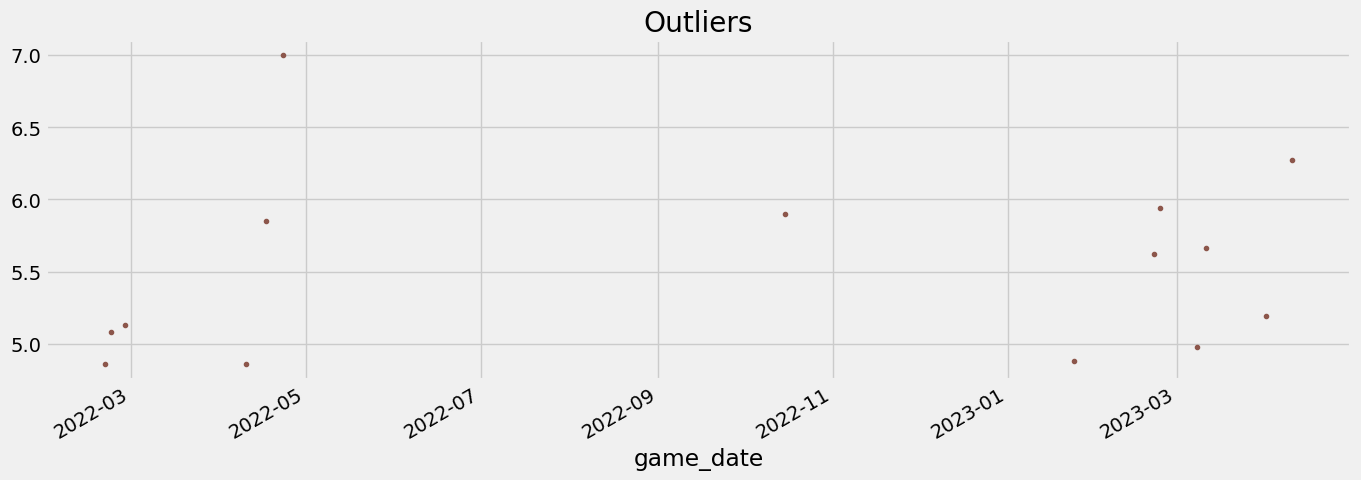

In [25]:
df.query(f'{TARGET} > 4.75')[TARGET] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [26]:
df = df.query(f'{TARGET} > 4.75').copy()